### LIBs

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### DEFINE DATASET STRUCTURE

In [213]:
DataBase = pd.DataFrame(columns=['thirdFeature','secondFeature','firstFeature','SAMPLE','TIME [s]','Column 2 [unit]'])

##### If for some reason you need to split the process of saving the data (for example, if there is a lot of data and you are not able to do it in one go), 
##### save the preceding session to a csv file. Start the next session by loading this saved file, rather than giving the column structure as above. 
##### This way you will be adding new data to the already existing database. 

In [324]:
#DataBase = pd.read_csv('DataBase.csv')

### LOADING THE DATA

<Axes: >

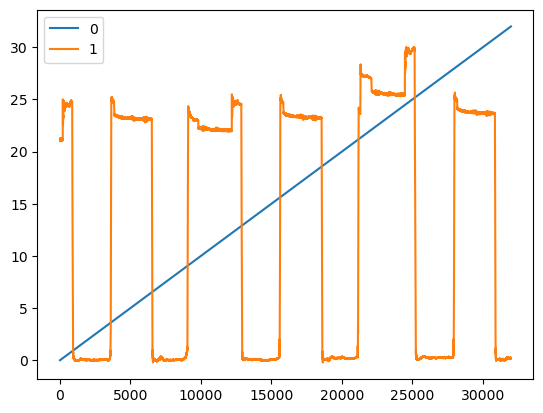

In [20]:
sampleNumber = 1 # You may also have few samples of measurements under same conditions. Provide this information in pd.read_csv method
firstFeature = 300 #e.g. int
secondFeature = 300 #e.g. int
thirdFeature = 'flat' # e.g. string {'flat','triangle'}
df = pd.read_csv('exemplary_data/{}_{}_{}.csv'.format(firstFeature,secondFeature,thirdFeature),skiprows=1,header = None)
df = df.drop(2,axis='columns') # if data read some blind NaN columns, drop them accrodingly
#df.head() # either plot the data or peak the head
df.plot()  # either plot the data or peak the head

### Selection of the range to be extracted

<Axes: >

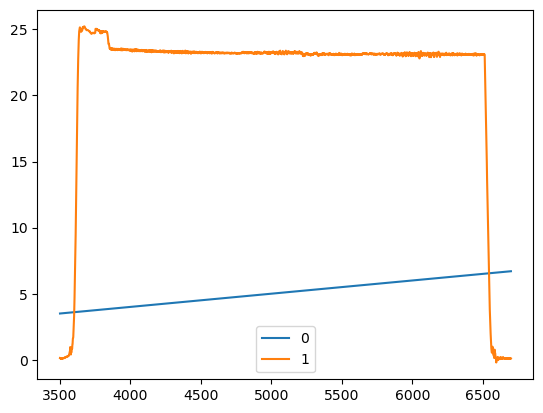

In [21]:
buffor_df = df.iloc[3500:6700] #select particular data range basing on df.plot() above 
buffor_df.plot()
#buffor_df.head()

### Appending the extracted scope to the database

In [34]:
subSampleNumber = 2 #make sure to manualy change this number accrodingly
buffor_df.rename(columns = {1:'Column 2 [unit]'}, inplace = True) # is the name of a column of data containing a physical value.
buffor_df['SAMPLE'] = '{}'.format(subSampleNumber)
buffor_df['firstFeature'] = '{}'.format(firstFeature)
buffor_df['secondFeature'] = '{}'.format(secondFeature)
buffor_df['thirdFeature'] = '{}'.format(thirdFeature)


# please provide the measurement recording step in np.arrange e.g. 0.001 s (1000 Hz). 
#This funcion also assigns a new time range for each measurement sample. 
#It allows them to be compared later within the database
buffor_df['TIME [s]'] = np.arange(0.0,len(buffor_df.index)/1000.0,0.001) 

# Determine the order of columns
buffor_df = buffor_df[DataBase.columns]
# Appending the extracted scope to the database
DataBase = pd.concat([DataBase,buffor_df], ignore_index=True)
DataBase

,thirdFeature,secondFeature,firstFeature,SAMPLE,TIME [s],Column 2 [unit]
0,flat,300,300,2,0.000,0.13325
1,flat,300,300,2,0.001,0.12794
2,flat,300,300,2,0.002,0.11057
3,flat,300,300,2,0.003,0.09257
4,flat,300,300,2,0.004,0.12875
...,...,...,...,...,...,...
3195,flat,300,300,2,3.195,0.09851
3196,flat,300,300,2,3.196,0.09959
3197,flat,300,300,2,3.197,0.12092
3198,flat,300,300,2,3.198,0.10904


### Database chart if for some reason you would like to peak it

<Axes: >

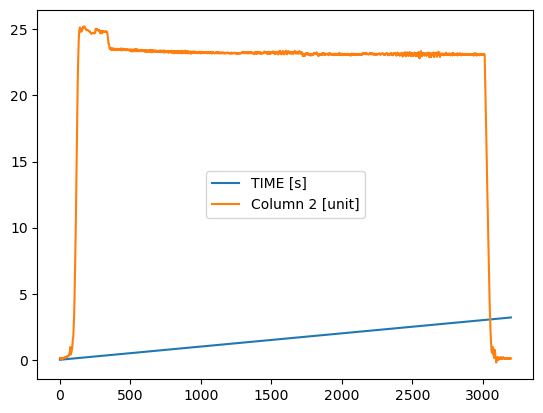

In [35]:
DataBase.plot()

### When you finish feeding your dataset save it in csv file

##### Same as at the top of Notebook
##### If for some reason you need to split the process of saving the data (for example, if there is a lot of data and you are not able to do it in one go), 
##### save the preceding session to a csv file. Start the next session by loading this saved file, rather than giving the column structure as above. 
##### This way you will be adding new data to the already existing database. 

In [ ]:
DataBase.to_csv('DataBase.csv', index=False) 